<a href="https://colab.research.google.com/github/CyShahedB/AiMl_Module4_shahed/blob/main/Mohammad_Shahed_Assignment_of_Probabilistic_ML_models_CNN_0129.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exercises**
### **Convolution Neural Networks**

### Exercise
###1. Try padding in convolution on lotus.jpg and show results

In [68]:
# Get the sample image
!curl -L -o 'lotus.jpg' 'https://drive.google.com/uc?export=download&id=1gQSQlrUws22KLRUacXwvN1G8FtIyhfGt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2815  100  2815    0     0   2865      0 --:--:-- --:--:-- --:--:-- 2749k


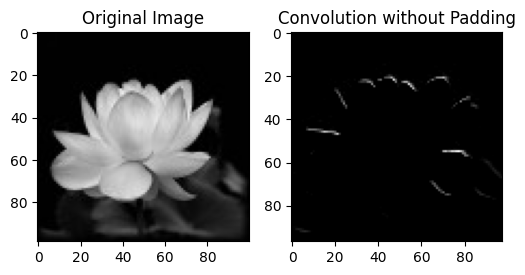

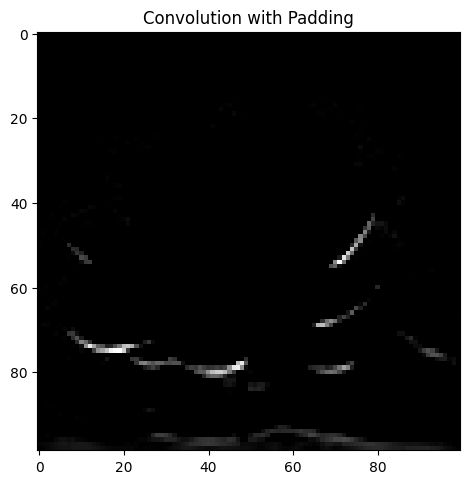

In [69]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the image
image_path = "lotus.jpg"  # Replace with the actual path to your image
image = tf.keras.preprocessing.image.load_img(image_path)
image_array = tf.keras.preprocessing.image.img_to_array(image)

# Add batch dimension and normalize the image
input_image = tf.expand_dims(image_array, axis=0) / 255.0

# Display the original image
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

# Apply convolution without padding
conv_without_padding = tf.keras.layers.Conv2D(1, (3, 3), activation='relu')(input_image)
plt.subplot(1, 2, 2)
plt.imshow(conv_without_padding[0, :, :, 0], cmap='gray')
plt.title("Convolution without Padding")

# Apply convolution with padding
conv_with_padding = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='relu')(input_image)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(conv_with_padding[0, :, :, 0], cmap='gray')
plt.title("Convolution with Padding")

plt.show()

###2. Try stride  in convolution on lotus.jpg and show results

In [70]:
pip install opencv-python


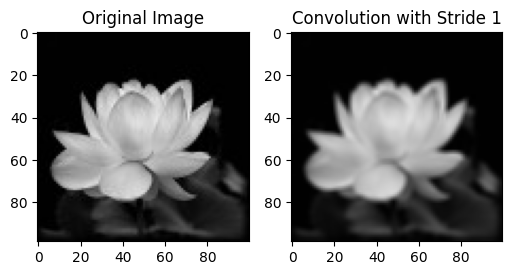

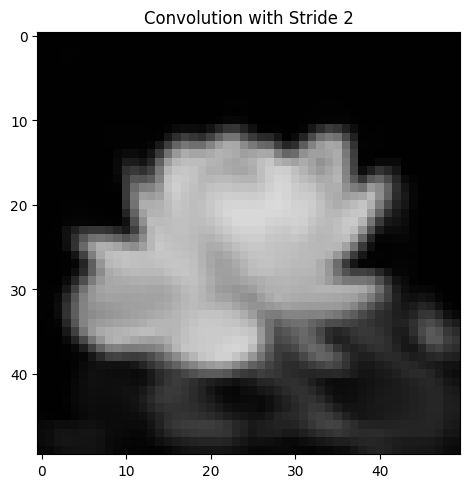

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "lotus.jpg"  # Replace with the actual path to your image

# Check if the image file exists
try:
    image = cv2.imread(image_path)

    if image is None:
        raise FileNotFoundError(f"Error: Unable to load the image from the path '{image_path}'.")

except Exception as e:
    print(f"Error: {e}")
    exit()

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, 0)

# Display the original image
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, 0))
plt.title("Original Image")

# Apply convolution with stride 1
kernel = np.ones((3, 3), np.float32) / 9
conv_stride_1 = cv2.filter2D(gray_image, -1, kernel)
plt.subplot(1, 2, 2)
plt.imshow(conv_stride_1, cmap='gray')
plt.title("Convolution with Stride 1")

# Apply convolution with stride 2 manually
stride = 2
conv_stride_2 = cv2.filter2D(gray_image[::stride, ::stride], -1, kernel)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(conv_stride_2, cmap='gray')
plt.title("Convolution with Stride 2")

plt.show()


### **Exercises**

###Q 1: What is the ratio of parameters in single 5 x 5 kernel and equivalent stacked 3 x 3 kernels? Consider number of channels in input and output channels as C.

**1. Single 5x5 Kernel:**

For a single 5x5 kernel, the number of parameters (weights) is determined by the size of the kernel (5x5) and the number of input and output channels.
The formula is:
Parameters(single) =C1×C2×5×5


**2. Equivalent Stacked 3x3 Kernels:**

Instead of using one 5x5 kernel, we can use multiple 3x3 kernels stacked on top of each other.
For each 3x3 kernel, the number of parameters is:
Parameters(3x3) =C1×C2×3×3

>>If we use N stacked 3x3 kernels, the total number of parameters becomes:
Parameters(stacked) =N× Parameters(3x3)

>>Assuming N = 3 (using three 3x3 kernels to cover the same spatial extent as a 5x5 kernel):
Parameters(stacked) = 3 × Parameters(3x3)


**3. Ratio:**

The ratio of parameters is given by:
Ratio = Parameters(single)/Parameters(stacked)
      = c1*c2*5*5/3*c1*c2*3*3
      = 25/27


By calculating this ratio, we can understand how many times more parameters a single 5x5 kernel has compared to the equivalent stacked 3x3 kernels. This is important in neural network design to optimize the model's efficiency and performance.

###Q 2: How can you replace 7 x 7 convolution kernel using only 3 x 3 kernels? What would be ratio of parameters in this case? Consider number of channels in input and output channels as C.

To replace a 7x7 convolution kernel using only 3x3 kernels, we can use a combination of multiple 3x3 kernels. The key is to find a configuration of 3x3 kernels that covers the same receptive field as the 7x7 kernel. One way to achieve this is by using a series of overlapping 3x3 kernels.


**1. Single 7x7 Kernel:**

For a single 7x7 kernel, the number of parameters (weights) is determined by the size of the kernel (7x7) and the number of input and output channels.
The formula is:
Parameters(single) =C1×C2×7×7

**2. Equivalent Stacked 3x3 Kernels:**

To replace the 7x7 kernel, we can use overlapping 3x3 kernels.
The receptive field covered by three consecutive 3x3 kernels with stride 1 is equivalent to a 7x7 kernel.
For each 3x3 kernel, the number of parameters is:

Parameters(3x3) = C1×C2×3×3

>>If you we three stacked 3x3 kernels:
Parameters(stacked) = 3 × Parameters(3x3)

**3. Ratio:**

The ratio of parameters is given by:
Ratio = Parameters(single)/Parameters(stacked)

 By calculating this ratio, you we understand how many times more parameters a single 7x7 kernel has compared to the equivalent stacked 3x3 kernels. This replacement is often used in deep learning architectures to reduce the number of parameters while preserving the effective receptive field.

### **Exercises**

### Q1: List a few practical applications of convolutional autoencoders.

Convolutional autoencoders, which combine convolutional neural network (CNN) architecture with autoencoder principles, find applications in various domains due to their ability to learn hierarchical representations of data. Here are a few practical applications of convolutional autoencoders:

**Image Denoising:**

Convolutional autoencoders can be used for image denoising by learning to reconstruct clean images from noisy ones. The network learns to capture essential features while removing noise during the encoding-decoding process.

**Anomaly Detection:**

Convolutional autoencoders can learn to encode normal patterns in data and are sensitive to anomalies. They can be applied for detecting anomalous patterns in images, such as identifying defects in manufacturing or anomalies in medical images.

**Image Compression:**

Convolutional autoencoders can be used for image compression by learning efficient representations of images in the encoding phase. This can be beneficial in applications where bandwidth or storage constraints are critical.

**Feature Learning for Classification:**

Pre-training convolutional autoencoders on a large dataset allows the model to learn meaningful features. The pre-trained encoder can then be used for transfer learning in classification tasks, improving performance with limited labeled data.

**Semantic Segmentation:**

Convolutional autoencoders can be adapted for semantic segmentation tasks. By training the network to reconstruct segmented masks of input images, it learns to capture spatial relationships and can be used for pixel-wise image segmentation.

**Super-Resolution:**

Convolutional autoencoders can be employed for image super-resolution by learning to generate high-resolution images from low-resolution counterparts. This is useful in applications where enhancing image quality is crucial.

**Generative Modeling:**

Convolutional autoencoders can be used as generative models to generate new samples that resemble the training data. Variational Autoencoders (VAEs) combine convolutional autoencoders with probabilistic latent spaces, allowing for controlled generation of diverse samples.

**Medical Image Analysis:**

In medical imaging, convolutional autoencoders can aid in tasks such as denoising medical images, anomaly detection in scans, or generating synthetic images for data augmentation in training deep learning models.

**Content-Based Image Retrieval:**

By learning a compact representation of images, convolutional autoencoders can be used in content-based image retrieval systems, where similar images can be retrieved based on their learned features.

**Satellite Image Analysis:**

Convolutional autoencoders can assist in satellite image analysis tasks, including segmentation, feature extraction, and anomaly detection, providing valuable insights in fields such as agriculture, urban planning, and environmental monitoring.
These applications showcase the versatility of convolutional autoencoders in handling complex data structures, especially images, and extracting meaningful representations for various downstream tasks.

### Q2: What change do we need to make for the autoencoder to reduce into PCA?

To make an autoencoder behave more like Principal Component Analysis (PCA) for dimensionality reduction, we need to consider the following modifications:

**Architecture of Autoencoder:**

Use a shallow architecture with a small bottleneck layer. The size of the bottleneck layer should be set to the desired number of principal components.
Ensure that the encoder and decoder are symmetrical to create a balanced structure.

Activation Functions:

Use linear activation functions in both the bottleneck layer and the output layer of the autoencoder. Linear activations do not introduce non-linearities, making the autoencoder's behavior closer to PCA.

**Loss Function:**

Use a mean squared error (MSE) loss function. This loss is commonly used in PCA and encourages the autoencoder to learn a representation similar to PCA.

**Weight Initialization:**

Initialize the weights of the autoencoder with PCA. One way to do this is by setting the encoder weights to be the principal components obtained from PCA. This initialization aligns the autoencoder's learning process with the linear transformations captured by PCA.

**The code related to it using Python and Keras:**

from keras.layers import Input, Dense

from keras.models import Model

encoding_dim = 2

input_img = Input(shape=(original_dimension,))

encoded = Dense(encoding_dim, activation='linear')(input_img)

decoded = Dense(original_dimension, activation='linear')(encoded)  

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True, validation_data=(X_val, X_val))


# Conclusion:
This configuration makes the autoencoder more aligned with the linear transformations performed by PCA. By using a linear activation function, linear loss, and initializing weights with PCA-like components, you guide the autoencoder to capture linear relationships in the data, akin to the principles of PCA. Keep in mind that this approach may not perfectly replicate PCA, especially when dealing with non-linear relationships in the data. Adjustments may be needed based on the specific characteristics of your data and the dimensionality reduction goals.
